In [45]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [47]:
! pip install tensorflow==2.0.0b1 --user

In [61]:
print(tf.__version__)

1.13.1


In [48]:
def plot_series(time, series, format='-', start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.grid(True)

In [49]:
def trend(time, slope=0):
    return slope*time

In [50]:
def seasonal_pattern(seasonal_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(seasonal_time < 0.1,
                   np.cos(seasonal_time * 7 * np.pi),
                   1/ np.exp(5 * seasonal_time))

In [51]:
def seasonality(time,period, amplitude=1, phase=0):    
    """Repeats the same pattern at each period
    ## Amplitude : دامنه 
    """
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)   

In [52]:
def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.rand(len(time)) * noise_level


In [53]:
time = np.arange(4*365 + 1, dtype='float32')
baseline=10
amplitude=40
slope=0.01
noise_level=2

In [54]:
# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

In [55]:
# update with noise
series += noise(time, noise_level, seed=42)

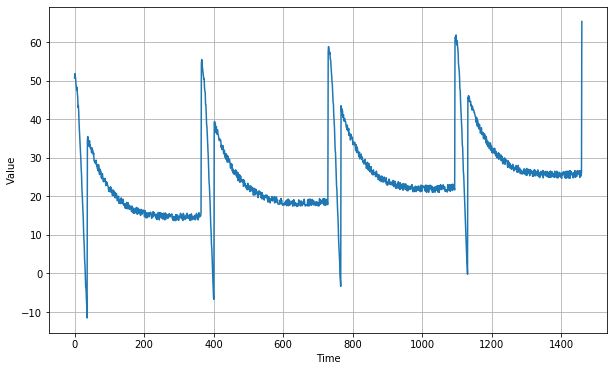

In [56]:
plt.figure(figsize=(10,6))
plot_series(time, series)
plt.show()

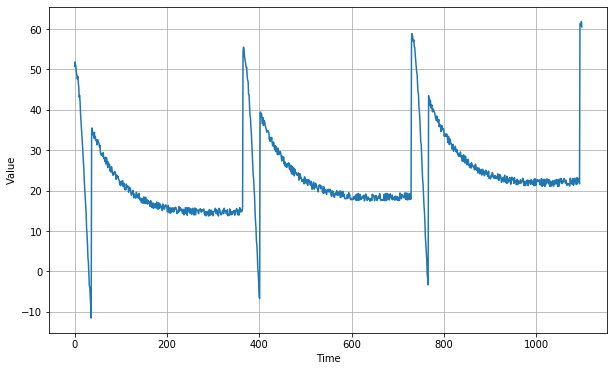

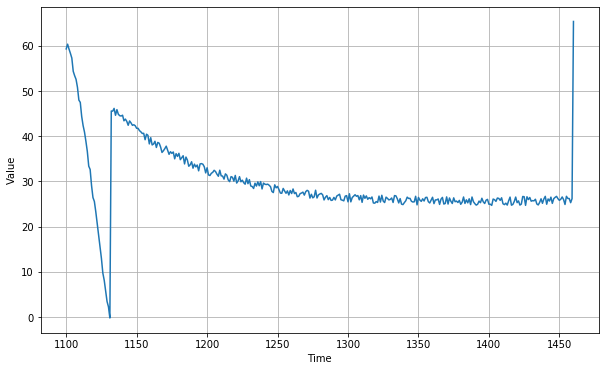

In [57]:
split_time = 1100
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]
plt.figure(figsize=(10, 6))
plot_series(time_train, x_train)
plt.show()

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plt.show()

# Naive Forecast

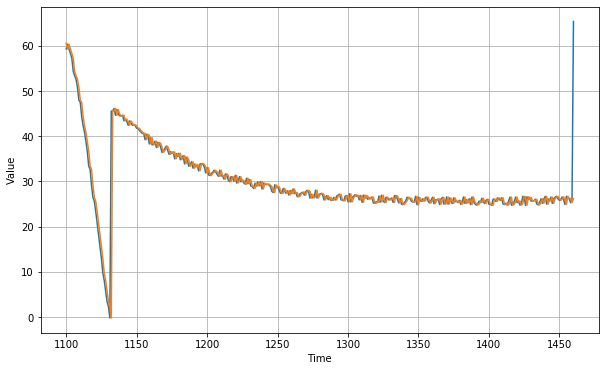

In [58]:
naive_forecast = series[split_time - 1:-1]
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, naive_forecast)

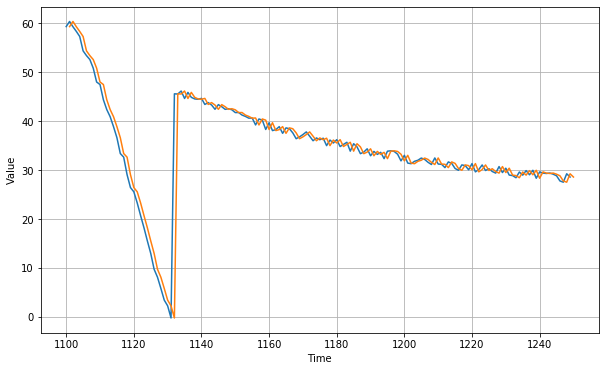

In [59]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid, start=0, end=150)
plot_series(time_valid, naive_forecast, start=1, end=151)

In [60]:
print(keras.metrics.mean_squared_error(x_valid, naive_forecast).numpy())
print(keras.metrics.mean_absolute_error(x_valid, naive_forecast).numpy())

AttributeError: 'Tensor' object has no attribute 'numpy'